In [1]:
import os
import shutil
import cv2
from skimage import io
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches

from tqdm.notebook import tqdm

In [2]:
# Get all filenames
imgs = sorted(glob('imgs_aligned/20*'))

In [3]:
# Extract number of images
N_total = len(imgs)
N_total

7777

In [4]:
# Compute mean image to know the extent
imgs_subset = [io.imread(f) for f in tqdm(imgs[::100])]

  0%|          | 0/78 [00:00<?, ?it/s]

In [5]:
subset_mean = np.mean(imgs_subset, axis=0).astype('uint8')
del imgs_subset
subset_mean.shape

(2160, 3840, 3)

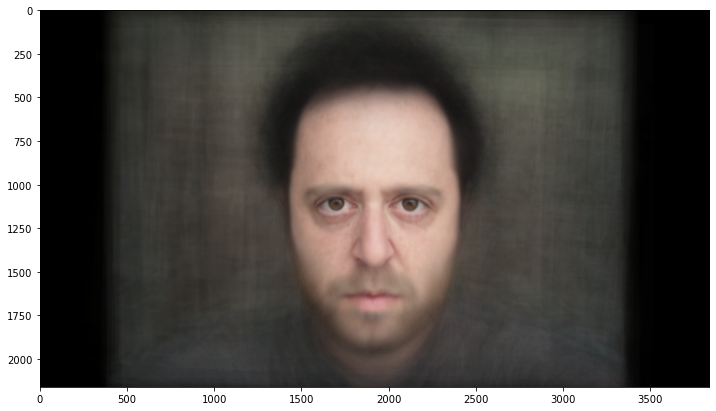

In [6]:
plt.figure(figsize=(12, 10))
plt.imshow(subset_mean);

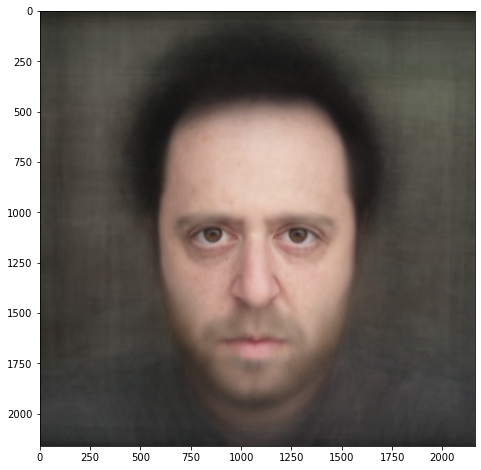

In [7]:
img_square = subset_mean[:, 840:-840]
plt.figure(figsize=(8, 8))
plt.imshow(img_square);

In [8]:
img_square.shape

(2160, 2160, 3)

# Store squars as npy files

In [9]:
nth = 30
out_dir = 'imgs_npy_%d' % nth

In [10]:
npys = sorted(glob('imgs_npy_%d/*npz' % nth))
len(npys)

259

# Create a tile

In [11]:
im = np.load(npys[-1])['arr_0'].astype('uint8')
im.shape

(2160, 2160, 3)

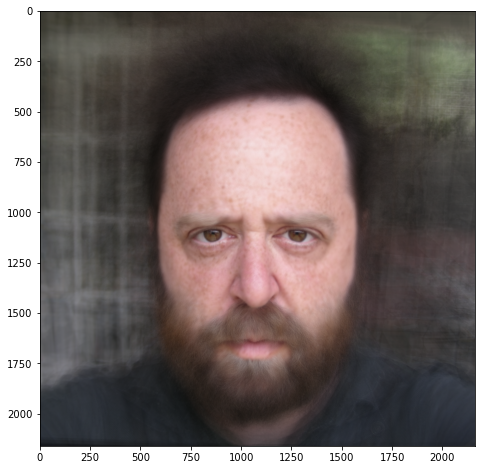

In [12]:
plt.figure(figsize=(8, 8))
plt.imshow(im)

# Single day raster (every day and every week)

## Every week

In [22]:
N = np.floor(np.sqrt(len(imgs[::7]))).astype('int')
width = int(im.shape[0]/N)
height = int(im.shape[1]/N)
N, width, height

(33, 65, 65)

In [23]:
counter = np.arange(N**2)

new_img = []
for i in tqdm(range(N)):
    row = []
    for j in range(N):
        content = io.imread(imgs[::7][counter[i*N+j]])[:, 840:-840].astype('uint8')
        row.append(content[i*width:(i+1)*width, j*height:(j+1)*height])
    new_img.append(np.concatenate(row, axis=1))
collage = np.concatenate(new_img, axis=0)

# Save file to output
out_filename = 'noah_%dx%d_days_square.jpg' % (N, N)
io.imsave(out_filename, collage)

  0%|          | 0/33 [00:00<?, ?it/s]

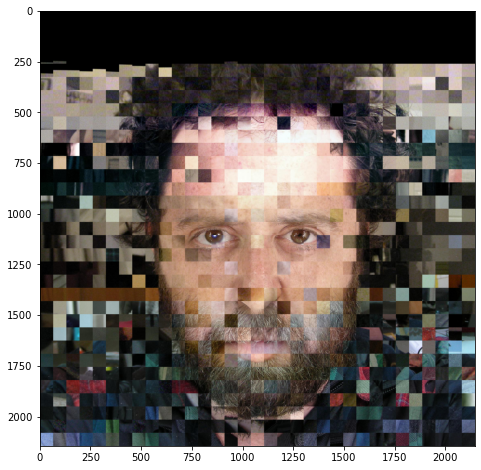

In [24]:
plt.figure(figsize=(8, 8))
plt.imshow(collage)

## Everyday

In [19]:
N = np.floor(np.sqrt(len(imgs))).astype('int')
width = int(im.shape[0]/N)
height = int(im.shape[1]/N)
N, width, height

(88, 24, 24)

In [20]:
counter = np.arange(N**2)

new_img = []
for i in tqdm(range(N)):
    row = []
    for j in range(N):
        content = io.imread(imgs[counter[i*N+j]])[:, 840:-840].astype('uint8')
        row.append(content[i*width:(i+1)*width, j*height:(j+1)*height])
    new_img.append(np.concatenate(row, axis=1))
collage = np.concatenate(new_img, axis=0)

# Save file to output
out_filename = 'noah_%dx%d_days_square.jpg' % (N, N)
io.imsave(out_filename, collage)

  0%|          | 0/88 [00:00<?, ?it/s]

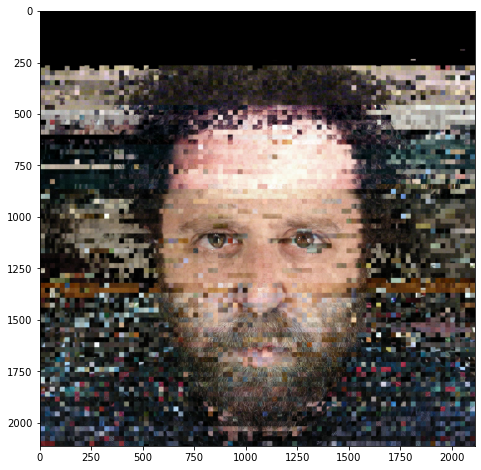

In [21]:
plt.figure(figsize=(8, 8))
plt.imshow(collage)

## Everyday ::-1

In [13]:
N = np.floor(np.sqrt(len(imgs))).astype('int')
width = int(im.shape[0]/N)
height = int(im.shape[1]/N)
N, width, height

(88, 24, 24)

In [15]:
counter = np.arange(N**2)[::-1]

new_img = []
for i in tqdm(range(N)):
    row = []
    for j in range(N):
        content = io.imread(imgs[counter[i*N+j]])[:, 840:-840].astype('uint8')
        row.append(content[i*width:(i+1)*width, j*height:(j+1)*height])
    new_img.append(np.concatenate(row, axis=1))
collage = np.concatenate(new_img, axis=0)

  0%|          | 0/88 [00:00<?, ?it/s]

In [16]:
# Save file to output
out_filename = 'noah_%dx%d_days_square_-1.jpg' % (N, N)
io.imsave(out_filename, collage)

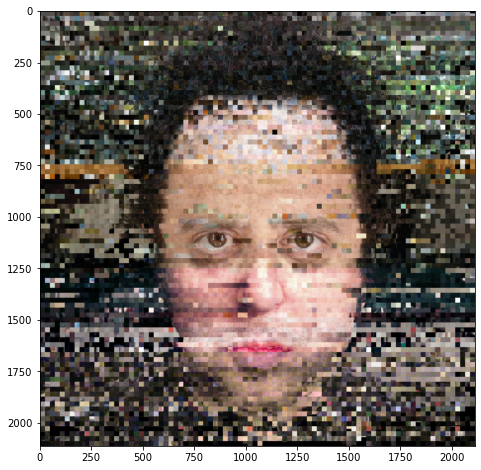

In [17]:
plt.figure(figsize=(8, 8))
plt.imshow(collage)

## Every month

In [22]:
N = np.floor(np.sqrt(len(npys))).astype('int')
width = int(im.shape[0]/N)
height = int(im.shape[1]/N)
N, width, height

(16, 135, 135)

In [25]:
counter = np.arange(N**2)

In [29]:
new_img = []
for i in tqdm(range(N)):
    row = []
    for j in range(N):
        content = np.load(npys[counter[i*N+j]])['arr_0'].astype('uint8')
        row.append(content[i*width:(i+1)*width, j*height:(j+1)*height])
    new_img.append(np.concatenate(row, axis=1))
collage = np.concatenate(new_img, axis=0)

  0%|          | 0/16 [00:00<?, ?it/s]

In [30]:
# Save file to output
out_filename = 'noah_%dx%d_days_square.jpg' % (N, N)
io.imsave(out_filename, collage)

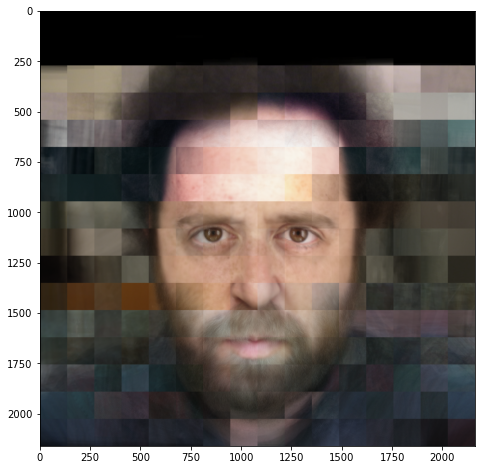

In [31]:
plt.figure(figsize=(8, 8))
plt.imshow(collage)

# Collage 30-days video

In [13]:
N = np.floor(np.sqrt(len(npys))).astype('int')
width = int(im.shape[0]/N)
height = int(im.shape[1]/N)
N, width, height

(16, 135, 135)

In [14]:
!rm -rf imgs_collage_square
out_dir = 'imgs_collage_square'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [15]:
counter = np.arange(len(npys))

for count in tqdm(range(len(npys))):
    
    new_img = []
    for i in range(N):
        row = []
        for j in range(N):
            content = np.load(npys[counter[i*N+j]])['arr_0'].astype('uint8')
            row.append(content[i*width:(i+1)*width, j*height:(j+1)*height])
        new_img.append(np.concatenate(row, axis=1))
    collage = np.concatenate(new_img, axis=0)
    counter += 1
    counter[counter>len(npys)-1] = 0
    
    # Save file to output
    out_filename = 'noah_%dx%d_%05d_square.jpg' % (N, N, count)
    io.imsave(os.path.join(out_dir, out_filename), collage)

  0%|          | 0/259 [00:00<?, ?it/s]

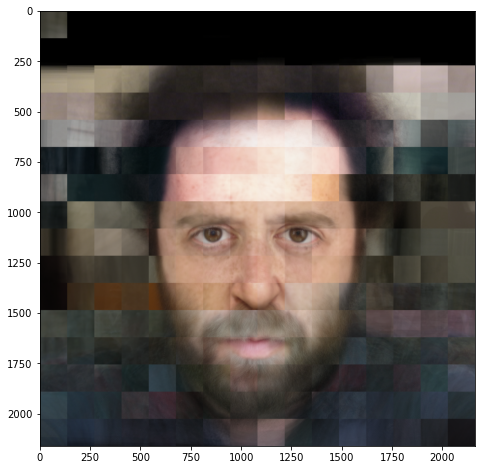

In [16]:
plt.figure(figsize=(8, 8))
plt.imshow(collage)

In [21]:
!rm video_collage_square.mp4
!cat imgs_collage_square/*jpg | ffmpeg -f image2pipe -r 24 -vcodec mjpeg -i - -vcodec libx264 video_collage_square.mp4

rm: video_collage_square.mp4: No such file or directory
ffmpeg version 4.4 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 11.1.0
  configuration: --prefix=/Users/mnotter/opt/anaconda3/envs/adsml --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-libx265 --enable-libaom --enable-libxml2 --enable-libvpx --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/Users/runner/miniforge3/conda-bld/ffmpeg_1635310033626/_build_env/bin/pkg-config
  libavutil      56. 70.100 / 56. 70.100
  libavcodec     58.134.100 / 58.134.100
  libavformat    58. 76.100 / 58. 76.100
  libavdevice    58. 13.100 / 58. 13.100
  libavfilter     7.110.100 /  7.110.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  9.100 /  